## Models and Bottles 

I'm going to start by trying to predict the price of a bottle of cabernet based on the features from the wine.com data. Because price is a continuous variable, I'm going to start with a linear model. Although there are a number of underlying assumptions with these models, they are intuitive and easy to interpret. Independence, normal distributions and linear relationships between explanatory and target variables are key assumptions. The statsmodels package has some good tools for building these models, so I'll make use of it.

In [1]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

cab_df2 = pd.read_csv('./cablist4.csv')
cab_df2['intercept'] = 1.0

/Users/gregorybronn/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
cab_df2.describe()

,Id,Vintage,RatingScore,PriceRetail,UnqWordInd,Attribute_94+ Rated Wine,Attribute_Big &amp; Bold,Attribute_Boutique Wines,Attribute_Business Gifts,Attribute_Collectible Wines,...,Attribute_Screw Cap Wines,Attribute_Smooth &amp; Supple,Region_California,Region_Israel,Region_Italy,Region_South Africa,Region_South America,Region_Spain,Region_Washington,intercept
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,...,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.0
mean,112412.600949,2005.779116,93.040891,114.292286,0.217598,0.000365,0.421687,0.047463,0.000730,0.338810,...,0.028478,0.098941,0.749544,0.001460,0.005476,0.007667,0.074480,0.003651,0.073750,1.0
std,25939.233217,5.289617,2.461198,123.222508,0.412688,0.019108,0.493919,0.212665,0.027017,0.473392,...,0.166363,0.298638,0.433355,0.038194,0.073814,0.087241,0.262598,0.060324,0.261411,0.0
min,316.000000,1978.000000,89.000000,7.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,102982.000000,2004.000000,91.000000,41.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,117430.000000,2007.000000,93.000000,76.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,129752.500000,2009.000000,95.000000,135.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,148089.000000,2014.000000,100.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [3]:
features = ['Vintage', 'RatingScore', 'UnqWordInd', 'Attribute_94+ Rated Wine', \
            'Attribute_Boutique Wines', 'Attribute_Business Gifts',\
            'Attribute_Collectible Wines', 'Attribute_Earthy &amp; Spicy', 'Attribute_Great Bottles to Give',\
            'Attribute_Green Wines', 'Attribute_Kosher Wines', 'Attribute_Older Vintages', \
            'Attribute_Private Cellar List', 'Attribute_Rich &amp; Creamy', 'Attribute_Screw Cap Wines', \
            'Attribute_Smooth &amp; Supple', 'Region_California', 'Region_Italy', 'Region_South Africa',\
            'Region_South America', 'Region_Spain', 'Region_Washington', 'intercept']
target = ['PriceRetail']

### Trimming the variables

I have a lot of features, so I'm going to inspect the correlations and find the best ones for use in building my model.

In [4]:
cab_df2.corr()['PriceRetail'].sort_values()

Vintage                           -0.200514
Region_South America              -0.198796
Attribute_Smooth &amp; Supple     -0.194388
Attribute_Screw Cap Wines         -0.119089
Attribute_Big &amp; Bold          -0.105921
Attribute_Earthy &amp; Spicy      -0.096072
Attribute_Green Wines             -0.069350
Region_South Africa               -0.058396
Region_Italy                      -0.045563
Region_Washington                 -0.033368
Region_Israel                     -0.027953
Region_Spain                      -0.026187
Attribute_Kosher Wines            -0.016313
Attribute_Rich &amp; Creamy       -0.015094
Attribute_Private Cellar List     -0.003355
Attribute_94+ Rated Wine          -0.002219
Attribute_Business Gifts           0.000046
Attribute_Older Vintages           0.008058
Attribute_Great Bottles to Give    0.014415
Id                                 0.065825
Attribute_Boutique Wines           0.105710
UnqWordInd                         0.157739
Region_California               

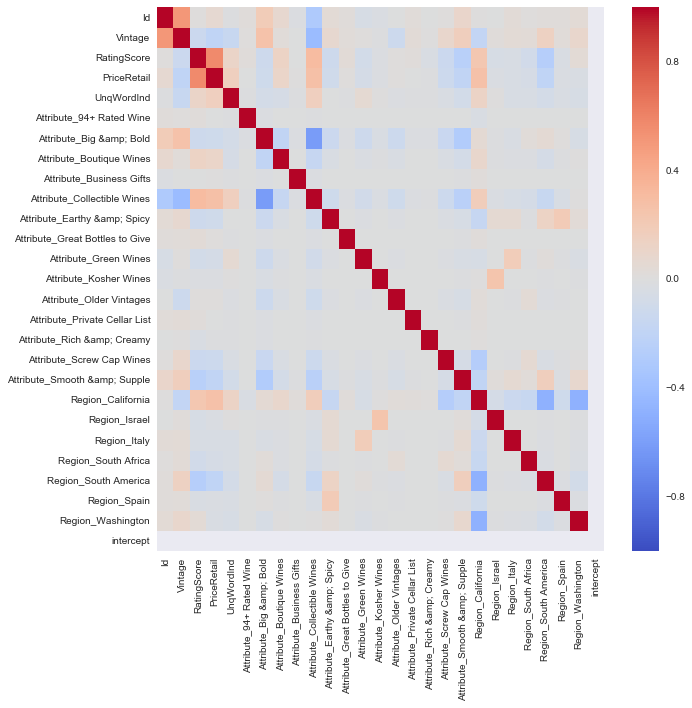

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cab_df2.corr(), cmap='coolwarm')

In [6]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

X = cab_df2[features]
y = cab_df2.PriceRetail.values

selector = SelectPercentile(percentile=25)
selector.fit(X,y)

idxs_selected = selector.get_support(indices=True)

new_feats = []
for i in idxs_selected:
    new_feats.append(features[i])
    
new_feats

/Users/gregorybronn/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [22] are constant.
  UserWarning)
/Users/gregorybronn/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


['Vintage',
 'RatingScore',
 'Attribute_Collectible Wines',
 'Attribute_Kosher Wines',
 'Region_California',
 'Region_South America']

In [7]:
x = cab_df2[new_feats]
y = cab_df2[target]

#Split into train/test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=39)

In [8]:
x_train.head()

,Vintage,RatingScore,Attribute_Collectible Wines,Attribute_Kosher Wines,Region_California,Region_South America
2020,2004,92,0,0,0,0
1035,2007,94,1,0,1,0
335,2008,96,1,0,1,0
321,1997,96,1,0,1,0
560,2007,95,0,0,1,0


In [9]:
y_train.head()

,PriceRetail
2020,57.99
1035,209.00
335,195.00
321,239.00
560,129.00


In [10]:
#Build model using stats models
lr = sm.OLS(y_train, x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PriceRetail   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     596.8
Date:                Wed, 04 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:54:46   Log-Likelihood:                -10910.
No. Observations:                1835   AIC:                         2.183e+04
Df Residuals:                    1829   BIC:                         2.187e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Vintage                        -1.0795      0.044    -24.413      0.000      -1.166      -0.993
RatingScore                    24.0841      0.959     25.114      0.000      22.203      25.965
Attribute_Collectible Wines    19.6331      4.906      4.002      0.000      10.012      29.254
Attribute_Kosher Wines        -11.2224     46.396     -0.242      0.809    -102.218      79.773
Region_California              36.0598      5.868      6.145      0.000      24.551      47.569
Region_South America            7.2016      9.668      0.745      0.456     -11.760      26.163
==============================================================================
Omnibus:                     1410.665   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34428.346
Skew:                           3.417   Prob(JB):                         0.00
Kurtosis:                      23.089   Cond. No.                     4.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### First Pass

The model has a poor r2 of 35%, and there are some problems with my variables. Both **Region_South America** and the **Attribute_Kosher Wines** variables contain zero in their 95% confidence intervals. As these aren't stable for prediction, I'm going to cut them from my prediction variables and rerun the model.

In [11]:
features2 = ['Vintage', 'RatingScore', 'Attribute_Collectible Wines', 'Region_California', 'intercept']

x = cab_df2[features2]
y = cab_df2[target]

#Split into train/test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=39)

In [12]:
#Build model using stats models
lr = sm.OLS(y_train, x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PriceRetail   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     249.7
Date:                Wed, 04 Apr 2018   Prob (F-statistic):          2.79e-171
Time:                        12:54:54   Log-Likelihood:                -10907.
No. Observations:                1835   AIC:                         2.182e+04
Df Residuals:                    1830   BIC:                         2.185e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Vintage                        -2.3001      0.458     -5.022      0.000      -3.198      -1.402
RatingScore                    23.8184      0.945     25.215      0.000      21.966      25.671
Attribute_Collectible Wines    14.2739      5.272      2.708      0.007       3.935      24.613
Region_California              32.3456      5.200      6.220      0.000      22.146      42.545
intercept                    2478.2869    920.803      2.691      0.007     672.351    4284.223
==============================================================================
Omnibus:                     1408.734   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33968.331
Skew:                           3.415   Prob(JB):                         0.00
Kurtosis:                      22.940   Cond. No.                     8.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Second Pass

This looks better, and the r2 is still 35%. Now let's see how good the predictions are by checking out the RMSE. I want the RMSE of the predictions to be within 30% of the average wine price, otherwise there's too much variability in them to be of use.

In [13]:
preds = pd.DataFrame(lr.predict(x_test))

In [14]:
#Calculating the root mean squared error
import statsmodels.tools.eval_measures as em

em.rmse(y_test, preds)

array([ 110.94735802])

In [15]:
#Calculating mean absolute error
em.meanabs(y_test, preds)


array([ 64.74256329])

In [16]:
#Calculating average price of wine in test set

avg_price = y_test['PriceRetail'].mean()
avg_price

122.84137168141665

In [17]:
#Calculating the ratio of RMSE to average wine price
em.rmse(y_test, preds)/avg_price

array([ 0.90317583])

## RMSE is too high

With a RMSE of 110 vs the average price of $122, there's too much error in the predictions. I'm going to remove any outliers outside of 2 standard deviations of the average price and see if the results improve. 

In [18]:
cab_df2 = cab_df2[cab_df2.PriceRetail < 360.00]

features2 = ['Vintage', 'RatingScore', 'Attribute_Collectible Wines', 'Region_California', 'intercept']

x = cab_df2[features2]
y = cab_df2[target]

#Split into train/test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=39)

lr = sm.OLS(y_train, x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PriceRetail   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     337.5
Date:                Wed, 04 Apr 2018   Prob (F-statistic):          5.99e-215
Time:                        12:55:33   Log-Likelihood:                -9390.5
No. Observations:                1739   AIC:                         1.879e+04
Df Residuals:                    1734   BIC:                         1.882e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Vintage                        -2.1134      0.274     -7.721      0.000      -2.650      -1.577
RatingScore                    13.8805      0.600     23.130      0.000      12.704      15.058
Attribute_Collectible Wines    24.1031      3.164      7.617      0.000      17.897      30.310
Region_California              33.2496      3.112     10.684      0.000      27.146      39.353
intercept                    3009.7745    550.983      5.463      0.000    1929.114    4090.435
==============================================================================
Omnibus:                      499.995   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1448.724
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                       6.364   Cond. No.                     8.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
preds = pd.DataFrame(lr.predict(x_test))

In [20]:
#Calculating the root mean squared error
import statsmodels.tools.eval_measures as em

em.rmse(y_test, preds)

array([ 52.11067985])

In [21]:
#Calculating mean absolute error
em.meanabs(y_test, preds)

array([ 36.59863074])

In [22]:
#Calculating average price of wine in test set

avg_price = y_test['PriceRetail'].mean()
avg_price

91.34555944055968

In [23]:
#Calculating the ratio of RMSE to average wine price
em.rmse(y_test, preds)/avg_price

array([ 0.57047852])

In [24]:
cab_df2['PriceRetail'].mean()

92.04570273392119

## Sour Grapes!

While I was able to improve the r2 from 35% to 44% by removing wines priced >360, I was not able to improve RMSE enough to feel confident in the value of the predictions. The RMSE is now 52 vs. an average price of $91. Although this is better than my earlier model, the error is still too large to be of reliable value. 

Time to try a different modeling approach!